In [1]:
!pip install tensorflow==2.0.0b1

     |████████████████████████████████| 87.9MB 50kB/s 
     |████████████████████████████████| 501kB 51.1MB/s 
     |████████████████████████████████| 3.1MB 63.6MB/s 
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
from os import path
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout



In [0]:
split_time = 1300

In [17]:
dataset = pd.read_csv('/content/drive/My Drive/sorted_data.csv')
training_set = dataset.iloc[:split_time, 2:3].values
len(dataset)

1454

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [19]:
X_train = []
y_train = []
no_of_sample = len(training_set)
no_of_sample

1300

In [0]:
for i in range(60, no_of_sample):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [0]:
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [22]:
# Xay dung model LSTM
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [23]:
regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)

Train on 1240 samples
Epoch 1/200
1240/1240 [==============================] - 5s 4ms/sample - loss: 0.0237
Epoch 2/200
1240/1240 [==============================] - 3s 3ms/sample - loss: 0.0039
Epoch 3/200
1240/1240 [==============================] - 3s 3ms/sample - loss: 0.0032
Epoch 4/200
1240/1240 [==============================] - 3s 3ms/sample - loss: 0.0033
Epoch 5/200
1240/1240 [==============================] - 3s 3ms/sample - loss: 0.0028
Epoch 6/200
1240/1240 [==============================] - 3s 3ms/sample - loss: 0.0027
Epoch 7/200
1240/1240 [==============================] - 3s 3ms/sample - loss: 0.0033
Epoch 8/200
1240/1240 [==============================] - 3s 3ms/sample - loss: 0.0033
Epoch 9/200
1240/1240 [==============================] - 3s 3ms/sample - loss: 0.0027
Epoch 10/200
1240/1240 [==============================] - 3s 3ms/sample - loss: 0.0023
Epoch 11/200
1240/1240 [==============================] - 3s 3ms/sample - loss: 0.0025
Epoch 12/200
1240/1240 [======

In [0]:
dataset_test = dataset.iloc[split_time:]
real_stock_price = dataset_test.iloc[:, 2:3].values
real_stock_price.shape
# Tien hanh du doan
dataset_total = dataset.iloc[:,2:3]
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
no_of_sample = len(inputs)

for i in range(60, no_of_sample):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


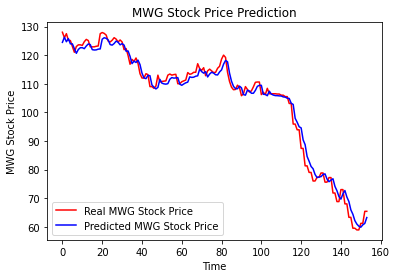

Stock price 4/04/2020 of MWG :  64.35256
Stock price 5/04/2020 of MWG :  64.15268
Stock price 6/04/2020 of MWG :  63.726757
Stock price 7/04/2020 of MWG :  63.332706
Stock price 8/04/2020 of MWG :  63.052677
Stock price 9/04/2020 of MWG :  62.88364
Stock price 10/04/2020 of MWG :  62.79208
Stock price 11/04/2020 of MWG :  62.740627
Stock price 12/04/2020 of MWG :  62.700356
Stock price 13/04/2020 of MWG :  62.6541
Stock price 14/04/2020 of MWG :  62.59495
Stock price 15/04/2020 of MWG :  62.522808
Stock price 16/04/2020 of MWG :  62.44091
Stock price 17/04/2020 of MWG :  62.353333
Stock price 18/04/2020 of MWG :  62.263485
Stock price 19/04/2020 of MWG :  62.17363
Stock price 20/04/2020 of MWG :  62.0849
Stock price 21/04/2020 of MWG :  61.997623
Stock price 22/04/2020 of MWG :  61.911648
Stock price 23/04/2020 of MWG :  61.826668
Stock price 24/04/2020 of MWG :  61.742367
Stock price 25/04/2020 of MWG :  61.658524
Stock price 26/04/2020 of MWG :  61.57501
Stock price 27/04/2020 of MWG

In [25]:
# Ve bieu do gia that va gia du doan
plt.plot(real_stock_price, color = 'red', label = 'Real MWG Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted MWG Stock Price')
plt.title('MWG Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('MWG Stock Price')
plt.legend()
plt.show()




dataset_test = dataset_test['Dongcua'][len(dataset_test)-60:len(dataset_test)].to_numpy()
dataset_test = np.array(dataset_test)

inputs = dataset_test
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)


i = 4
while i<31:
    X_test = []
    no_of_sample = len(dataset_test)

    # Lay du lieu cuoi cung
    X_test.append(inputs[no_of_sample - 60:no_of_sample, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Du doan gia
    predicted_stock_price = regressor.predict(X_test)

    # chuyen gia tu khoang (0,1) thanh gia that
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    # Them ngay hien tai vao
    dataset_test = np.append(dataset_test, predicted_stock_price[0], axis=0)
    inputs = dataset_test
    inputs = inputs.reshape(-1, 1)
    inputs = sc.transform(inputs)

    print('Stock price ' + str(i) + '/04/2020 of MWG : ', predicted_stock_price[0][0])
    i = i +1